In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset (Upload Kaggle Pima Indians Diabetes Dataset)
df = pd.read_csv("diabetes.csv")

# Display first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [4]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)

df.isnull().sum()  # Confirm cleanup


/tmp/ipython-input-2688342354.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


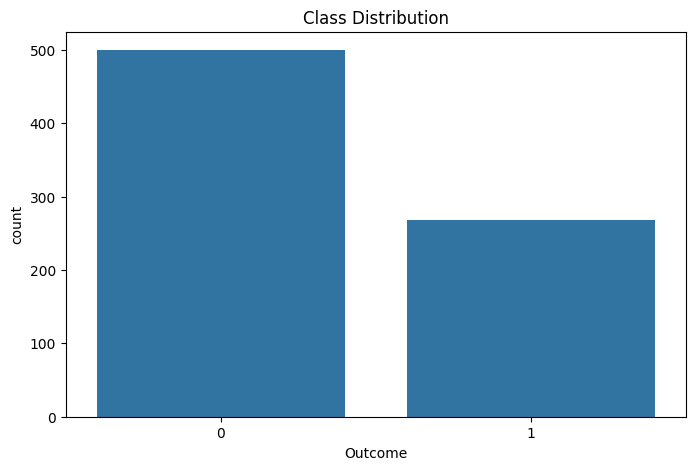

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Outcome")
plt.title("Class Distribution")
plt.show()


In [6]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
knn = KNeighborsClassifier(n_neighbors=5)  # default K=5
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7083

Confusion Matrix:
 [[89 34]
 [22 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       123
           1       0.58      0.68      0.63        69

    accuracy                           0.71       192
   macro avg       0.69      0.70      0.69       192
weighted avg       0.72      0.71      0.71       192



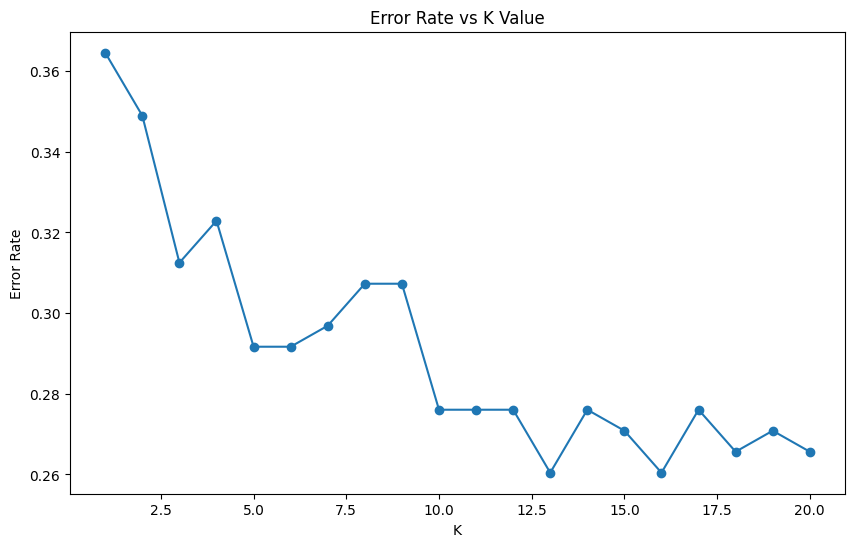

In [12]:
error_rate = []

for i in range(1, 21):
    knn_test = KNeighborsClassifier(n_neighbors=i)
    knn_test.fit(X_train_scaled, y_train)
    pred_i = knn_test.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rate, marker="o")
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()
